In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import json
from sklearn.preprocessing import LabelEncoder


df_train = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_8/projet_8_mars.csv",sep='\t')
print(df_train.head())


  channelGrouping                            customDimensions        date  \
0     Paid Search           [{'index': '4', 'value': 'APAC'}]  2017-03-12   
1  Organic Search                                          []  2017-03-12   
2          Direct  [{'index': '4', 'value': 'North America'}]  2017-03-12   
3  Organic Search           [{'index': '4', 'value': 'APAC'}]  2017-03-12   
4  Organic Search           [{'index': '4', 'value': 'APAC'}]  2017-03-12   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  6018775317735347795   
1  {"browser": "Chrome", "browserVersion": "not a...  4502602144434229509   
2  {"browser": "Chrome", "browserVersion": "not a...  1047720525322501048   
3  {"browser": "Safari", "browserVersion": "not a...  2980931954171389805   
4  {"browser": "Firefox", "browserVersion": "not ...  3426870913361457794   

                                          geoNetwork  \
0  {"continent": "

In [2]:
def string_to_dict(dict_string):
    return json.loads(dict_string)

In [3]:
def create_new_dataset(df,json_col):
    new = df.copy()
    colonnes = new.columns
    for col in json_col:
        print(col)
        new[col] = new[col].apply(string_to_dict)
        new = pd.concat([new,(pd.io.json.json_normalize(new[col]))], axis=1)

    for i in colonnes:
        new = new.drop(columns=i)
    
    return new

In [4]:
def graphique_total(df,col,head=5,min1=None,min2=None,max1=None,max2=None):
    try : 
        df[df[col].isna()==False]=df[df[col].isna()==False].astype({col:int})
    except :
        df[df[col].isna()==False]=df[df[col].isna()==False].astype({col:float})
    print(df.groupby(col)[col].count().head(head))
   
    plt.scatter(pd.Series(df[df[col].isna()==False][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][col])[col].count())
    plt.xlabel(col)
    plt.ylabel("Nombre de personnes")
    plt.title("Répartition de {0} par personne".format(col))
    plt.show()
    
    if min1!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]<min1][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]<min1][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne inférieur à {1}".format(col,min1))
        plt.show()
        
    if min2!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]<min2][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]<min2][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne inférieur à {1}".format(col,min2))
        plt.show()
        
    if max1!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]>max1][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]>max1][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne supérieur à {1}".format(col,max1))
        plt.show()
        
    if max2!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]>max2][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]>max2][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne supérieur à {1}".format(col,max2))
        plt.show()

In [295]:
# Partie nettoyage

In [296]:
print(df_train[df_train.duplicated()]) # Pas de doublons

Empty DataFrame
Columns: [channelGrouping, customDimensions, date, device, fullVisitorId, geoNetwork, hits, socialEngagementType, totals, trafficSource, visitId, visitNumber, visitStartTime]
Index: []


In [297]:
# Nettoyage de socialEngagementType

In [298]:
print(df_train.socialEngagementType.unique()) 
#Uniquement un seul résultat. Drop de la colonne

['Not Socially Engaged']


In [299]:
df_train=df_train.drop(columns={"socialEngagementType"})

In [300]:
# Nettoyage de ChannelGrouping

['Paid Search' 'Organic Search' 'Direct' 'Referral' 'Affiliates' 'Display'
 'Social' '(Other)']
channelGrouping
(Other)               5
Affiliates         3477
Direct            27305
Display            1387
Organic Search    73599
Paid Search        3542
Referral          21391
Social            33314
Name: date, dtype: int64


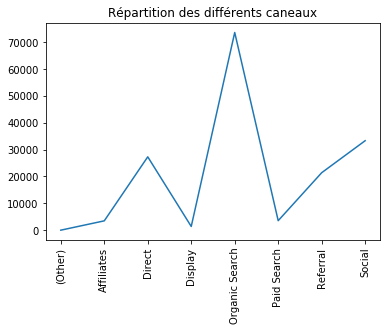

In [301]:
print(df_train.channelGrouping.unique())
print(df_train.groupby('channelGrouping').count().date)
plt.plot(df_train.groupby('channelGrouping').count().date)
plt.xticks(rotation='vertical')
plt.title("Répartition des différents caneaux")
plt.show()

In [302]:
# Nettoyage de date

In [303]:
df_train["date"]=pd.to_datetime(df_train.date,format='%Y/%m/%d')
print("Il y a",int(pd.DataFrame(df_train.date.unique()).count()),"dates")
print("\nLa date la plus ancienne est le :")
print("\n",pd.DataFrame(df_train.date.unique()).min())
print("\nLa date la plus récente est le :")
print("\n",pd.DataFrame(df_train.date.unique()).max())

Il y a 62 dates

La date la plus ancienne est le :

 0   2017-03-01
dtype: datetime64[ns]

La date la plus récente est le :

 0   2018-03-31
dtype: datetime64[ns]


In [304]:
print(df_train.date.describe())

count                  164020
unique                     62
top       2018-03-21 00:00:00
freq                     4434
first     2017-03-01 00:00:00
last      2018-03-31 00:00:00
Name: date, dtype: object


In [305]:
print(df_train.date.min())
print(df_train.date.max())

print(df_train.date[df_train.date.dt.day>31])
print(df_train.date[df_train.date.dt.day<1])
print(df_train.date[df_train.date.dt.month!=3])

print(df_train.date[df_train.date.dt.year==2017].count())
print(df_train.date[df_train.date.dt.year==2018].count())

# 69931 données en 2017 et 94089 données en 2018

2017-03-01 00:00:00
2018-03-31 00:00:00
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
69931
94089


In [306]:
# Nettoyage VisitStartTime

In [307]:
readable_date=pd.to_datetime(df_train.visitStartTime,unit="s")

In [308]:
print(readable_date.sort_values(ascending=True).head()) 
print("\n")
print(readable_date.sort_values(ascending=False).head()) 

# Les dates vont du 1er mars 2017 au 1er Avril 2018, certainement dû au décallage horaire

print("\n")
print(readable_date[readable_date.duplicated()].count())

# 3722 dates en double, pas réellement étonnant

128014   2017-03-01 08:00:35
127645   2017-03-01 08:02:05
126724   2017-03-01 08:02:56
128301   2017-03-01 08:03:04
127251   2017-03-01 08:03:48
Name: visitStartTime, dtype: datetime64[ns]


85210   2018-04-01 06:58:48
85090   2018-04-01 06:58:02
85326   2018-04-01 06:57:53
86286   2018-04-01 06:56:49
85889   2018-04-01 06:56:41
Name: visitStartTime, dtype: datetime64[ns]


3722


In [309]:
print(readable_date[readable_date<"2017-03-01"])
print(readable_date[readable_date>"2018-04-02"])  # Il ne semble pas y avoir d'incoérence

Series([], Name: visitStartTime, dtype: datetime64[ns])
Series([], Name: visitStartTime, dtype: datetime64[ns])


In [310]:
df_train.visitStartTime=pd.to_datetime(df_train.visitStartTime,unit="s")

In [311]:
# Nettoyage de visitNumber

In [312]:
print(df_train.visitNumber.describe())  #Il  semble y avoir un ou plusieurs outlier(s)

count    164020.000000
mean          2.547476
std          11.065449
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         451.000000
Name: visitNumber, dtype: float64


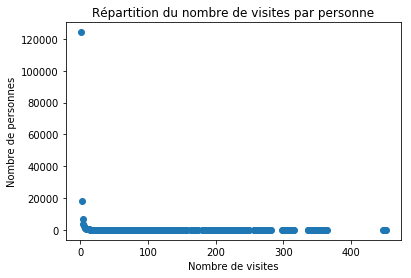

In [313]:
plt.scatter(pd.Series(df_train.visitNumber.unique()).sort_values(ascending=True),df_train.groupby(df_train.visitNumber).visitNumber.count())
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de personnes")
plt.title("Répartition du nombre de visites par personne")
plt.show()

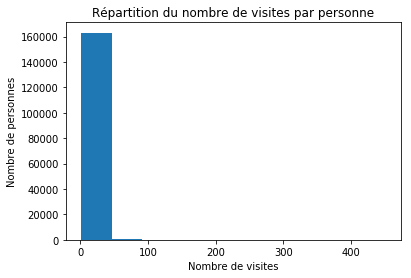

In [314]:
plt.hist(df_train.visitNumber)
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de personnes")
plt.title("Répartition du nombre de visites par personne")
plt.show()

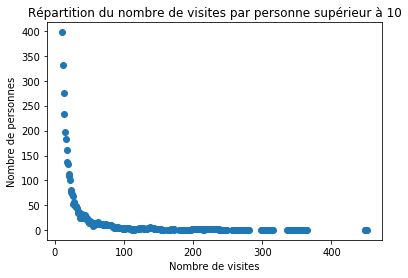

In [315]:
plt.scatter(pd.Series(df_train[df_train.visitNumber>10].visitNumber.unique()).sort_values(ascending=True),df_train.groupby(df_train[df_train.visitNumber>10].visitNumber).visitNumber.count())
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de personnes")
plt.title("Répartition du nombre de visites par personne supérieur à 10")
plt.show()

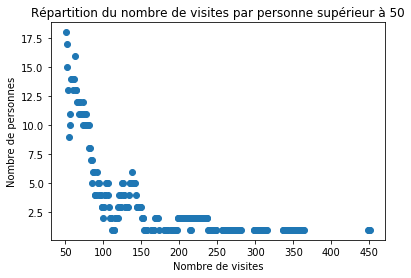

In [316]:
plt.scatter(pd.Series(df_train[df_train.visitNumber>50].visitNumber.unique()).sort_values(ascending=True),df_train.groupby(df_train[df_train.visitNumber>50].visitNumber).visitNumber.count())
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de personnes")
plt.title("Répartition du nombre de visites par personne supérieur à 50")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


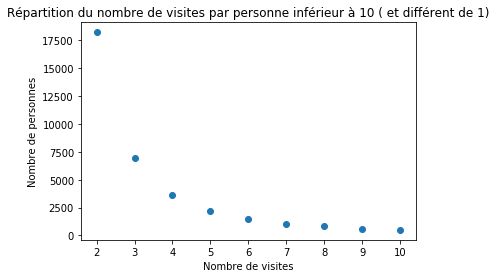

In [317]:
plt.scatter(pd.Series(df_train[df_train.visitNumber<11][df_train.visitNumber>1].visitNumber.unique()).sort_values(ascending=True),df_train.groupby(df_train[df_train.visitNumber<11][df_train.visitNumber>1].visitNumber).visitNumber.count())
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de personnes")
plt.title("Répartition du nombre de visites par personne inférieur à 10 ( et différent de 1)")
plt.show()

In [318]:
print(df_train.groupby(df_train.visitNumber).visitNumber.count().tail(20))  #à laisser ou non ? 

visitNumber
349    1
350    1
351    1
352    1
353    1
354    1
355    1
356    1
357    1
358    1
359    1
360    1
361    1
362    1
363    1
364    1
448    1
449    1
450    1
451    1
Name: visitNumber, dtype: int64


In [319]:
# Nettoyage de fullVisitorId

In [320]:
print(df_train.fullVisitorId.describe())

count                  164020
unique                 134481
top       6829200181358925007
freq                       49
Name: fullVisitorId, dtype: object


In [321]:
print(pd.to_numeric(df_train.fullVisitorId, errors='coerce').sort_values(ascending=False, na_position="first").head())
print(pd.to_numeric(df_train.fullVisitorId, errors='coerce').sort_values(ascending=True, na_position="first").head())

45110             NaN
61380    9.891190e+19
61011    9.490735e+19
45332    9.406860e+19
61005    8.875697e+19
Name: fullVisitorId, dtype: float64
45110              NaN
105069    3.946050e+13
58379     5.249938e+13
94962     5.897081e+13
32277     6.160998e+13
Name: fullVisitorId, dtype: float64


In [322]:
print(df_train[pd.to_numeric(df_train.fullVisitorId, errors='coerce').isnull()])  
#NaN à l'emplacement 45110, à enlever peut-être, erreur bizarre. ordre de grandeur 3.8e+19

      channelGrouping                            customDimensions       date  \
45110          Direct  [{'index': '4', 'value': 'North America'}] 2018-03-24   

                                                  device  \
45110  {"browser": "Safari", "browserVersion": "not a...   

              fullVisitorId  \
45110  37816138082121595206   

                                              geoNetwork  \
45110  {"continent": "Americas", "subContinent": "Nor...   

                                                    hits  \
45110  [{'hitNumber': '1', 'time': '0', 'hour': '3', ...   

                                                  totals  \
45110  {"visits": "1", "hits": "1", "pageviews": "1",...   

                                           trafficSource     visitId  \
45110  {"campaign": "(not set)", "source": "(direct)"...  1521885828   

       visitNumber      visitStartTime  
45110            1 2018-03-24 10:03:48  


In [323]:
#Nettoyage visitId

In [324]:
print(df_train.visitId.describe()) # Tout semble OK

count    1.640200e+05
mean     1.507796e+09
std      1.560466e+07
min      1.488355e+09
25%      1.489992e+09
50%      1.520271e+09
75%      1.521442e+09
max      1.522566e+09
Name: visitId, dtype: float64


In [326]:
# Nettoyage des colonnes JSON

In [327]:
device = create_new_dataset(df_train,["device"])

device


In [329]:
geo = create_new_dataset(df_train,["geoNetwork"])

geoNetwork


In [330]:
totals = create_new_dataset(df_train,["totals"])

totals
  bounces hits newVisits pageviews sessionQualityDim timeOnSite  \
0       1    1       NaN         1               NaN        NaN   
1       1    1         1         1               NaN        NaN   
2       1    1         1         1               NaN        NaN   
3       1    1         1         1               NaN        NaN   
4       1    1       NaN         1               NaN        NaN   

  totalTransactionRevenue transactionRevenue transactions visits  
0                     NaN                NaN          NaN      1  
1                     NaN                NaN          NaN      1  
2                     NaN                NaN          NaN      1  
3                     NaN                NaN          NaN      1  
4                     NaN                NaN          NaN      1  


In [331]:
traffic = create_new_dataset(df_train,["trafficSource"])

trafficSource


In [336]:
customDimensions = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_8/customDimensions.csv",names=["Col"])

                                        Col
0           {"index": "4", "value": "APAC"}
1                                       NaN
2  {"index": "4", "value": "North America"}
3           {"index": "4", "value": "APAC"}
4           {"index": "4", "value": "APAC"}


In [337]:
customDimensions["Col"]=customDimensions["Col"].replace(np.nan,"{}")

dimension = create_new_dataset(customDimensions,["Col"])

Col


In [338]:
print(dimension.head(10))

  index          value
0     4           APAC
1   NaN            NaN
2     4  North America
3     4           APAC
4     4           APAC
5   NaN            NaN
6   NaN            NaN
7     4           APAC
8     4  North America
9     4           EMEA


In [339]:
# Nettoyage device

In [340]:
device=device.replace({'not available in demo dataset': None})

In [341]:
device.isnull().sum() #12 colonnes remplies uniquement de None

browser                           0
browserSize                  164020
browserVersion               164020
deviceCategory                    0
flashVersion                 164020
isMobile                          0
language                     164020
mobileDeviceBranding         164020
mobileDeviceInfo             164020
mobileDeviceMarketingName    164020
mobileDeviceModel            164020
mobileInputSelector          164020
operatingSystem                   0
operatingSystemVersion       164020
screenColors                 164020
screenResolution             164020
dtype: int64

In [342]:
device=device[["browser","deviceCategory","isMobile","operatingSystem"]]

In [343]:
print(device.head())

   browser deviceCategory  isMobile operatingSystem
0   Chrome        desktop     False         Windows
1   Chrome        desktop     False         Windows
2   Chrome         mobile      True         Android
3   Safari        desktop     False       Macintosh
4  Firefox        desktop     False         Windows


In [344]:
print(device.groupby("browser").count().isMobile)

browser
;__CT_JOB_ID__:0a075729-93a5-43d0-9638-4cbd41d5f5a5;         1
;__CT_JOB_ID__:0b39e7ca-1431-42e3-ba1f-9d8951a65840;         1
;__CT_JOB_ID__:2e0eca60-83ab-482d-bb81-343d113254fb;         1
;__CT_JOB_ID__:6e9dcf2f-f58f-4938-91e3-77e00868177b;         1
;__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725;         1
;__CT_JOB_ID__:89e59554-ad41-4e94-957b-f12bd012530c;         1
;__CT_JOB_ID__:97909e28-4228-4b55-8ad5-cc791f2b583c;         1
;__CT_JOB_ID__:a24a8978-e5e8-4dc9-af66-c4ed89ea25d7;         1
;__CT_JOB_ID__:a7ed0808-e70c-4b19-b1a3-1018bbb7dc7f;         1
;__CT_JOB_ID__:a80e8e16-6e98-455b-885a-a4dd40f3d344;         1
Amazon Silk                                                151
Android Browser                                             92
Android Webview                                           6052
BlackBerry                                                  20
Browser                                                      1
CSM Click                                      

In [345]:
for i in range(0,10,1):
    j=device.groupby("browser").count().index[0]
    print(j)
    device=device[device.browser!=j]


;__CT_JOB_ID__:0a075729-93a5-43d0-9638-4cbd41d5f5a5;
;__CT_JOB_ID__:0b39e7ca-1431-42e3-ba1f-9d8951a65840;
;__CT_JOB_ID__:2e0eca60-83ab-482d-bb81-343d113254fb;
;__CT_JOB_ID__:6e9dcf2f-f58f-4938-91e3-77e00868177b;
;__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725;
;__CT_JOB_ID__:89e59554-ad41-4e94-957b-f12bd012530c;
;__CT_JOB_ID__:97909e28-4228-4b55-8ad5-cc791f2b583c;
;__CT_JOB_ID__:a24a8978-e5e8-4dc9-af66-c4ed89ea25d7;
;__CT_JOB_ID__:a7ed0808-e70c-4b19-b1a3-1018bbb7dc7f;
;__CT_JOB_ID__:a80e8e16-6e98-455b-885a-a4dd40f3d344;


In [346]:
print(device.groupby("browser").count().isMobile)

browser
Amazon Silk                    151
Android Browser                 92
Android Webview               6052
BlackBerry                      20
Browser                          1
CSM Click                        1
Chrome                      115897
Coc Coc                        193
DoCoMo                           1
Edge                          2255
Firefox                       6680
Internet Explorer             3687
Iron                             3
LYF_LS_4002_12                   1
Lunascape                        1
MRCHROME                        33
Maxthon                         15
Mozilla Compatible Agent        74
Nintendo Browser                21
Nokia Browser                   11
NokiaC7-00                       1
Opera                         1066
Opera Mini                    1841
Playstation Vita Browser         4
Puffin                          33
Reddit                           1
Safari                       22935
Safari (in-app)                986
Samsung Inte

In [347]:
print(device.groupby("deviceCategory").count()) #Pas de soucis

                browser  isMobile  operatingSystem
deviceCategory                                    
desktop          113003    113003           113003
mobile            45396     45396            45396
tablet             5611      5611             5611


In [348]:
print(device.groupby("isMobile").count()) #Pas de soucis

          browser  deviceCategory  operatingSystem
isMobile                                          
False      113027          113027           113027
True        50983           50983            50983


In [349]:
print(device.groupby("operatingSystem").count())  #1437 (not set)

                  browser  deviceCategory  isMobile
operatingSystem                                    
(not set)            1437            1437      1437
Android             29670           29670     29670
BlackBerry             27              27        27
Chrome OS            6015            6015      6015
Firefox OS              7               7         7
FreeBSD                 3               3         3
Linux                6680            6680      6680
Macintosh           39356           39356     39356
NTT DoCoMo              1               1         1
Nintendo 3DS            3               3         3
Nintendo WiiU          18              18        18
Nokia                   1               1         1
OS/2                   18              18        18
Playstation Vita        4               4         4
Samsung               154             154       154
SymbianOS               1               1         1
Tizen                 125             125       125
Windows     

In [350]:
print(device[device.operatingSystem=='(not set)'].groupby('browser').count())  #Presque tous les "(not set)" utilisent Opera Mini

                          deviceCategory  isMobile  operatingSystem
browser                                                            
Browser                                1         1                1
CSM Click                              1         1                1
Chrome                                19        19               19
LYF_LS_4002_12                         1         1                1
Mozilla Compatible Agent              70        70               70
Nokia Browser                          3         3                3
Opera Mini                          1342      1342             1342


In [351]:
print(device[device.operatingSystem=='(not set)'].groupby('deviceCategory').count())  #Presque tous les "(not set)" utilisent Opera Mini

                browser  isMobile  operatingSystem
deviceCategory                                    
desktop              95        95               95
mobile             1337      1337             1337
tablet                5         5                5


In [352]:
print(device[device.operatingSystem=='(not set)'].groupby('isMobile').count())  #Presque tous les "(not set)" utilisent Opera Mini

          browser  deviceCategory  operatingSystem
isMobile                                          
False          95              95               95
True         1342            1342             1342


In [353]:
print(device[device.browser=="Opera Mini"].head(10))

         browser deviceCategory  isMobile operatingSystem
523   Opera Mini         mobile      True         Android
643   Opera Mini         mobile      True         Android
679   Opera Mini         mobile      True         Android
797   Opera Mini         mobile      True         Android
806   Opera Mini         mobile      True         Android
975   Opera Mini         mobile      True       (not set)
1017  Opera Mini         tablet      True             iOS
1122  Opera Mini         mobile      True         Samsung
1367  Opera Mini         mobile      True       (not set)
1420  Opera Mini         mobile      True         Android


In [354]:
print(device[device.isMobile==True].count())

browser            50983
deviceCategory     50983
isMobile           50983
operatingSystem    50983
dtype: int64


In [355]:
print(device[device.deviceCategory=='mobile'].count()+device[device.deviceCategory=='tablet'].count())

browser            51007
deviceCategory     51007
isMobile           51007
operatingSystem    51007
dtype: int64


In [356]:
print(device[device.isMobile==False][device.deviceCategory=='mobile'].count())

browser            45
deviceCategory     45
isMobile           45
operatingSystem    45
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [357]:
print(device[device.isMobile==False][device.deviceCategory=='tablet']) #Intérêt de la colonne isMobile ?

      browser deviceCategory  isMobile operatingSystem
28228  Safari         tablet     False       Macintosh
35478  Safari         tablet     False       Macintosh


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [358]:
# Nettoyage geoNetwork

In [359]:
geo=geo.replace({'not available in demo dataset': None})
geo=geo.replace({'(not set)': None})

In [360]:
geo.isnull().sum() # 4 colonnes pleines de None, 4 colonnes pas totalement pleines mais tout de même bien remplies.
                   # Je décide de ne garder que continent, country et subContinent

city                93162
cityId             164020
continent             190
country               190
latitude           164020
longitude          164020
metro              124361
networkDomain       49235
networkLocation    164020
region              91083
subContinent          190
dtype: int64

In [361]:
geo=geo[["continent","country","subContinent"]]

In [362]:
#Nettoyage totals

In [363]:
totals.isna().sum()

bounces                     81697
hits                            0
newVisits                   39859
pageviews                      35
sessionQualityDim           69931
timeOnSite                  82583
totalTransactionRevenue    162113
transactionRevenue         162113
transactions               162107
visits                          0
dtype: int64

In [364]:
print(totals.bounces.unique())

['1' nan]


In [365]:
print(totals.newVisits.unique())

[nan '1']


In [366]:
def graphique_total(df,col,head=5,min1=None,min2=None,max1=None,max2=None):
    try : 
        df[df[col].isna()==False]=df[df[col].isna()==False].astype({col:int})
    except :
        df[df[col].isna()==False]=df[df[col].isna()==False].astype({col:float})
    print(df.groupby(col)[col].count().head(head))
   
    plt.scatter(pd.Series(df[df[col].isna()==False][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][col])[col].count())
    plt.xlabel(col)
    plt.ylabel("Nombre de personnes")
    plt.title("Répartition de {0} par personne".format(col))
    plt.show()
    
    if min1!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]<min1][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]<min1][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne inférieur à {1}".format(col,min1))
        plt.show()
        
    if min2!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]<min2][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]<min2][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne inférieur à {1}".format(col,min2))
        plt.show()
        
    if max1!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]>max1][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]>max1][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne supérieur à {1}".format(col,max1))
        plt.show()
        
    if max2!=None : 
        plt.scatter(pd.Series(df[df[col].isna()==False][df[df[col].isna()==False][col]>max2][col].unique()).sort_values(ascending=True),df[df[col].isna()==False].groupby(df[df[col].isna()==False][df[df[col].isna()==False][col]>max2][col])[col].count())
        plt.xlabel(col)
        plt.ylabel("Nombre de personnes")
        plt.title("Répartition de {0} par personne supérieur à {1}".format(col,max2))
        plt.show()
    

pageviews
1     82916
2     22658
3     14795
4      9076
5      6672
6      4822
7      3758
8      3004
9      2366
10     1892
Name: pageviews, dtype: int64


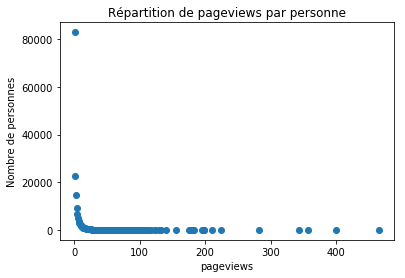

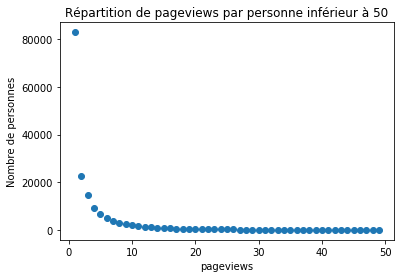

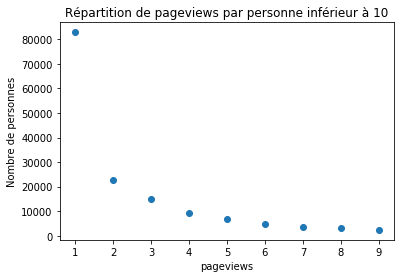

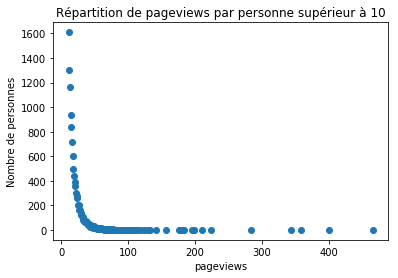

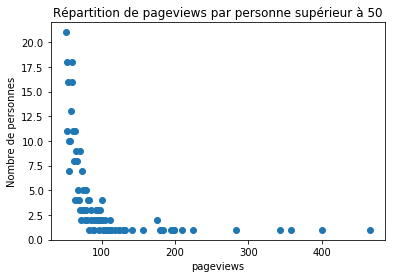

In [367]:
graphique_total(totals,"pageviews",10,50,10,10,50)

sessionQualityDim
1     74378
2      6381
3      2369
4      1217
5       831
6       682
7       544
8       428
9       391
10      325
Name: sessionQualityDim, dtype: int64


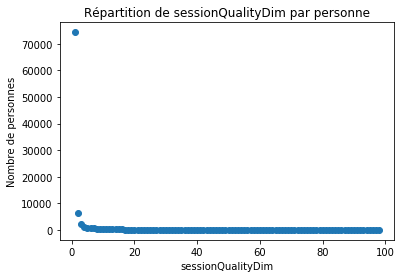

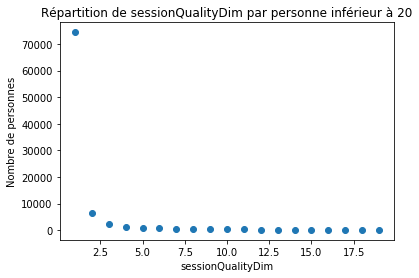

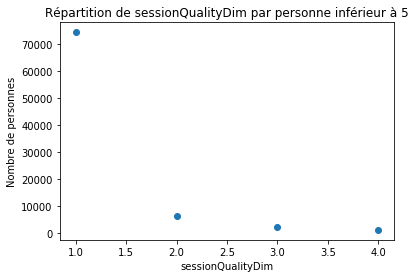

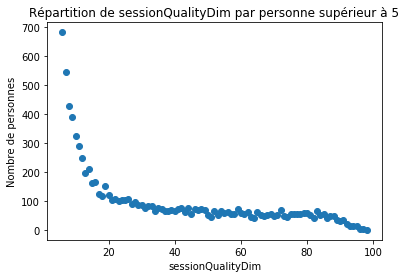

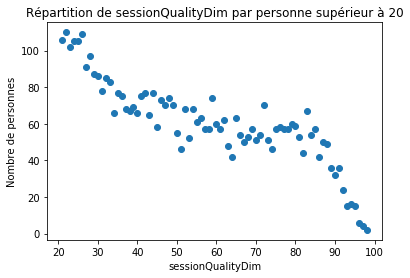

In [368]:
graphique_total(totals,"sessionQualityDim",10,20,5,5,20)

timeOnSite
1     137
2     236
3     498
4     725
5     751
6     771
7     742
8     782
9     801
10    833
Name: timeOnSite, dtype: int64


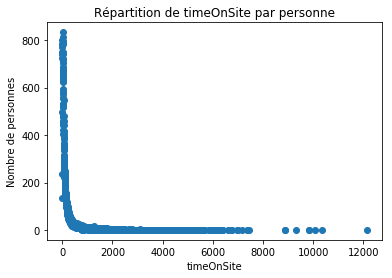

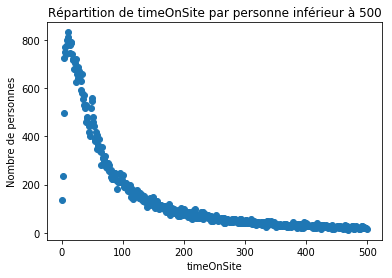

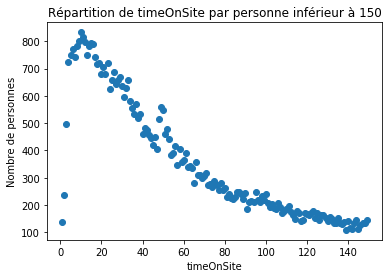

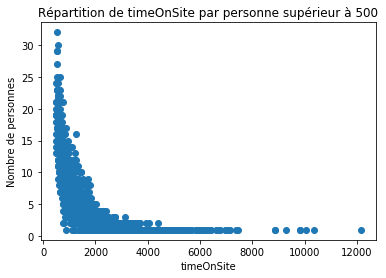

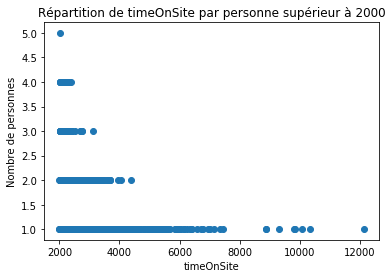

In [369]:
graphique_total(totals,"timeOnSite",10,500,150,500,2000)

transactions
1     1873
2       30
3        1
4        2
7        2
8        1
10       1
12       1
21       1
25       1
Name: transactions, dtype: int64


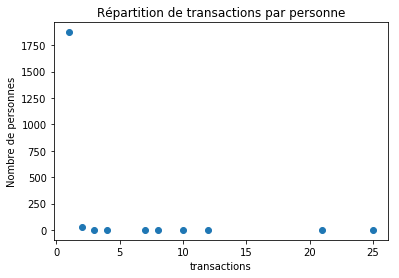

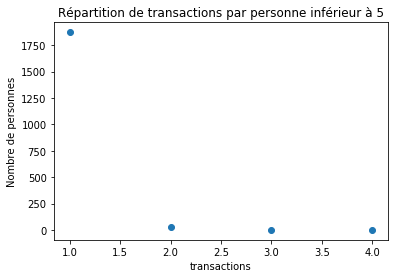

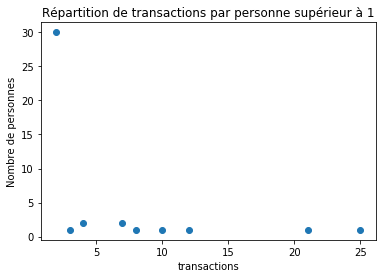

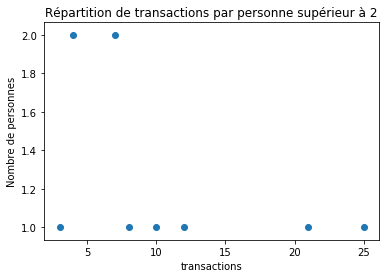

In [382]:
graphique_total(totals,"transactions",10,5,None,1,2)

In [384]:
# Nettoyage trafficSource

In [385]:
print(traffic.head())

                    adContent adwordsClickInfo.adNetworkType  \
0  Display Ad created 3/11/14                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

  adwordsClickInfo.criteriaParameters adwordsClickInfo.gclId  \
0       not available in demo dataset                    NaN   
1       not available in demo dataset                    NaN   
2       not available in demo dataset                    NaN   
3       not available in demo dataset                    NaN   
4       not available in demo dataset                    NaN   

  adwordsClickInfo.isVideoAd adwordsClickInfo.page adwordsClickInfo.slot  \
0                        NaN                   NaN                   NaN   
1                        NaN                   NaN                   NaN   
2 

In [386]:
traffic.isna().sum() #6 colonnes avec 3000 valeurs uniquement, 3 autres avec seulement plus de la moitié et 4 sans Na

adContent                              160740
adwordsClickInfo.adNetworkType         161022
adwordsClickInfo.criteriaParameters         0
adwordsClickInfo.gclId                 161012
adwordsClickInfo.isVideoAd             161022
adwordsClickInfo.page                  161022
adwordsClickInfo.slot                  161022
campaign                                    0
isTrueDirect                           111014
keyword                                 87506
medium                                      0
referralPath                           109316
source                                      0
dtype: int64

In [387]:
print(traffic[traffic.adContent.isna()==False].adContent.count()) 
#3280 fois pas Na

3280


In [388]:
print(traffic[traffic.adContent.isna()==False].groupby('adContent')['adContent'].count())

adContent
Ad from 11/3/16                          1
Ad from 11/7/16                          2
Ad from 12/13/16                         3
Ad from 12/15/17                       113
Ad from 12/21/16                         8
BQ                                      22
Display Ad created 3/11/14             284
Drinkware 336x280                       19
Full auto ad IMAGE ONLY                 14
Google Apparel                           1
Google Merchandise Collection         1038
Google Merchandise Store               324
Google Online Store                     39
Google Store                             2
Men's Apparel from Google                1
Office 2018 - 120 x 600                  1
Official Google Merchandise            127
Placememnt Drinkware 160x600             5
Placement 300 x 250                     47
Placement Accessores 300 x 250         495
Placement Accessories 160 x 600         47
Placement Accessories 336 x 280         39
Placement Accessories2 120 x 600         8
P

In [389]:
print(traffic[traffic["adwordsClickInfo.criteriaParameters"]!='not available in demo dataset']["adwordsClickInfo.adNetworkType"])

#Que des "not available in demo dataset"

traffic=traffic.drop(columns='adwordsClickInfo.criteriaParameters')

Series([], Name: adwordsClickInfo.adNetworkType, dtype: object)


In [390]:
print(traffic[traffic["campaign"]!='(not set)']["campaign"])

69        AW - Dynamic Search Ads Whole Site
204                         Data Share Promo
210                         Data Share Promo
212                         Data Share Promo
223                         Data Share Promo
231                         Data Share Promo
232                         Data Share Promo
233                         Data Share Promo
235                         Data Share Promo
237                         Data Share Promo
239                         Data Share Promo
261                         Data Share Promo
265                         Data Share Promo
276                         Data Share Promo
285                         Data Share Promo
291                         Data Share Promo
326                         AW - Accessories
337                         AW - Accessories
650                         AW - Accessories
672       AW - Dynamic Search Ads Whole Site
720                         AW - Accessories
726                         Data Share Promo
728       

In [391]:
print(traffic[traffic["isTrueDirect"]==False]["isTrueDirect"]) # Pas de False
print(traffic[traffic["isTrueDirect"].isna()==False]["isTrueDirect"].count()) # 53006 non NaN
print(traffic[traffic["isTrueDirect"]==True]["isTrueDirect"].count()) # 53006 'True'

# Toutes les valeurs qui ne sont pas des NaN sont des 'True'

Series([], Name: isTrueDirect, dtype: object)
53006
53006


In [392]:
print(traffic[traffic["keyword"].isna()==False][traffic["keyword"]!='(not provided)']["keyword"].head())
print(traffic[traffic["keyword"].isna()==False][traffic["keyword"]!='(not provided)']["keyword"].count())
#Pas certain que je vais l'utiliser

0      (Remarketing/Content targeting)
69                    6qEhsCssdK0z36ri
165                      google online
244    (Remarketing/Content targeting)
258                         google usa
Name: keyword, dtype: object
6107


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [393]:
print(traffic[traffic["medium"].isna()==False][traffic["medium"]!='(none)']['medium'].count())
print(traffic[traffic["medium"].isna()==False][traffic["medium"]!='(none)'][traffic["medium"]!='(not set)'].groupby('medium')["medium"].count())
traffic['medium']=traffic["medium"].replace('(none)', np.nan)
traffic['medium']=traffic["medium"].replace('(not set)', np.nan)
#Remplacement des valeurs '(none)' et '(not set)' par 'NaN'

123903


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


medium
affiliate     3477
cpc           4326
cpm            603
organic      73599
referral     41893
Name: medium, dtype: int64


In [394]:
print(traffic[traffic["referralPath"].isna()==False]['referralPath'].count())
#54704 valeurs non NaN

54704


In [395]:
print(traffic[traffic["referralPath"].isna()==False].groupby("referralPath")["referralPath"].count().sort_values(ascending=False))
#1291 valeurs différentes

referralPath
/                                                                                     12455
/yt/about/                                                                             5344
/analytics/web/                                                                        4041
/yt/advertise/                                                                         1473
/offer/2145                                                                            1005
/yt/creators/                                                                           953
/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts      931
/yt/about/ru/                                                                           919
/permissions/using-the-logo.html                                                        873
/intl/en/yt/advertise/                                                                  865
/moma                                                              

In [396]:
print(traffic[traffic["source"].isna()==False].groupby('source')["source"].count().sort_values(ascending=False))
#159 valeurs différentes

source
google                         76784
(direct)                       40118
youtube.com                    30727
analytics.google.com            4317
Partners                        3479
sites.google.com                1171
google.com                       932
dfa                              600
bing                             506
m.facebook.com                   416
mail.google.com                  391
quora.com                        387
qiita.com                        359
facebook.com                     332
yahoo                            331
reddit.com                       310
plus.url.google.com              300
baidu                            272
l.facebook.com                   224
groups.google.com                205
siliconvalley.about.com          187
blog.golang.org                  162
plus.google.com                  142
support.google.com               131
t.co                             103
duckduckgo.com                    79
away.vk.com                    

In [397]:
print(traffic[traffic["adwordsClickInfo.adNetworkType"].isna()==False].groupby('adwordsClickInfo.adNetworkType')['adwordsClickInfo.adNetworkType'].count())

adwordsClickInfo.adNetworkType
Content           784
Google Search    2214
Name: adwordsClickInfo.adNetworkType, dtype: int64


In [398]:
print(traffic[traffic["adwordsClickInfo.adNetworkType"].isna()==False].groupby('adwordsClickInfo.adNetworkType').count())
# Les 5 variables adwordsClickInfo ont des valeurs aux mêmes loc

                                adContent  adwordsClickInfo.gclId  \
adwordsClickInfo.adNetworkType                                      
Content                               784                     784   
Google Search                        1165                    2214   

                                adwordsClickInfo.isVideoAd  \
adwordsClickInfo.adNetworkType                               
Content                                                784   
Google Search                                         2214   

                                adwordsClickInfo.page  adwordsClickInfo.slot  \
adwordsClickInfo.adNetworkType                                                 
Content                                           784                    784   
Google Search                                    2214                   2214   

                                campaign  isTrueDirect  keyword  medium  \
adwordsClickInfo.adNetworkType                                            
Con

In [399]:
print(traffic[traffic["adwordsClickInfo.gclId"].isna()==False].groupby('adwordsClickInfo.gclId')["adwordsClickInfo.gclId"].count().sort_values(ascending=False))

adwordsClickInfo.gclId
CjwKEAiAxKrFBRDm25f60OegtwwSJABgEC-Z0_DLPcXHm1ZTqlR1YWeWXU875yaqwupt7pGMgFEZThoCeEzw_wcB        14
EAIaIQobChMIrKufnpLZ2QIVwpNkCh2q0QmUEAEYASAAEgIifPD_BwE                                         12
Cj0KEQiAot_FBRCqt8jVsoDKoZABEiQAqFL76LHSlBk--Nef3azG5vFpZSg_QP6OzQ9IPEE22l6zFC8aAtg28P8HAQ      11
EAIaIQobChMIsd34tObN2QIVgonICh30sgoEEAAYASAAEgJgcvD_BwE                                         11
EAIaIQobChMI4Pzxov_x2QIV1yeHCh2UEwPOEAEYASAAEgKacPD_BwE                                          9
Cj0KCQiAw9nUBRCTARIsAG11eicTUhQcm5WO3YmOaR19VeecqwGKdzGB9mHK8jSng-2j1c3YLGCw7mYaAh2KEALw_wcB     9
CjwKEAjwqZ7GBRC1srKSv9TV_iwSJADKTjaD7U5XcXbbvXw-Jr1RJONfAGSzPmgEmPdK2AAAIWzzzRoCti3w_wcB         7
EAIaIQobChMIxaL7mIHQ2QIVd8ThCh2DBQYaEAEYASAAEgJEEPD_BwE                                          7
Cj0KEQjw-73GBRCC7KODl9zToJMBEiQAj1Jgf1K9gNn_kZpAc6U9OWdbNl3aMPozp9e1JbYH7GgJ_qgaAmof8P8HAQ       7
CML87ZS65tYCFYUfaAodZrABAQ                                                            

In [400]:
print(traffic[traffic["adwordsClickInfo.isVideoAd"].isna()==False].groupby('adwordsClickInfo.isVideoAd')["adwordsClickInfo.isVideoAd"].count().sort_values(ascending=False))
#2998 Faux, aucun Vrai le reste que des NaN

adwordsClickInfo.isVideoAd
False    2998
Name: adwordsClickInfo.isVideoAd, dtype: int64


In [401]:
print(traffic[traffic["adwordsClickInfo.page"].isna()==False].groupby('adwordsClickInfo.page')["adwordsClickInfo.page"].count().sort_values(ascending=False))

adwordsClickInfo.page
1     2984
2       11
5        2
12       1
Name: adwordsClickInfo.page, dtype: int64


In [402]:
print(traffic[traffic["adwordsClickInfo.slot"].isna()==False].groupby('adwordsClickInfo.slot')["adwordsClickInfo.slot"].count().sort_values(ascending=False))

adwordsClickInfo.slot
Top    2189
RHS     809
Name: adwordsClickInfo.slot, dtype: int64


In [403]:
print(traffic.head())

                    adContent adwordsClickInfo.adNetworkType  \
0  Display Ad created 3/11/14                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

  adwordsClickInfo.gclId adwordsClickInfo.isVideoAd adwordsClickInfo.page  \
0                    NaN                        NaN                   NaN   
1                    NaN                        NaN                   NaN   
2                    NaN                        NaN                   NaN   
3                    NaN                        NaN                   NaN   
4                    NaN                        NaN                   NaN   

  adwordsClickInfo.slot   campaign isTrueDirect  \
0                   NaN  (not set)         True   
1                   NaN  (not set)          NaN   

In [404]:
print(df_train.head())

  channelGrouping                            customDimensions       date  \
0     Paid Search           [{'index': '4', 'value': 'APAC'}] 2017-03-12   
1  Organic Search                                          [] 2017-03-12   
2          Direct  [{'index': '4', 'value': 'North America'}] 2017-03-12   
3  Organic Search           [{'index': '4', 'value': 'APAC'}] 2017-03-12   
4  Organic Search           [{'index': '4', 'value': 'APAC'}] 2017-03-12   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  6018775317735347795   
1  {"browser": "Chrome", "browserVersion": "not a...  4502602144434229509   
2  {"browser": "Chrome", "browserVersion": "not a...  1047720525322501048   
3  {"browser": "Safari", "browserVersion": "not a...  2980931954171389805   
4  {"browser": "Firefox", "browserVersion": "not ...  3426870913361457794   

                                          geoNetwork  \
0  {"continent": "Asia",

In [405]:
#Merge des colonnes Json

In [406]:
df_train=df_train.drop(columns={"customDimensions","device","geoNetwork","totals","trafficSource"})

In [407]:
df_train=pd.merge(df_train,device,how="left",left_index=True,right_index=True)
df_train=pd.merge(df_train,geo,how="left",left_index=True,right_index=True)
df_train=pd.merge(df_train,totals,how="left",left_index=True,right_index=True)
df_train=pd.merge(df_train,dimension,how="left",left_index=True,right_index=True)
df_train=pd.merge(df_train,traffic,how="left",left_index=True,right_index=True)


In [408]:
print(df_train.head())

  channelGrouping       date        fullVisitorId     visitId  visitNumber  \
0     Paid Search 2017-03-12  6018775317735347795  1489384596           61   
1  Organic Search 2017-03-12  4502602144434229509  1489386442            1   
2          Direct 2017-03-12  1047720525322501048  1489321740            1   
3  Organic Search 2017-03-12  2980931954171389805  1489330188            1   
4  Organic Search 2017-03-12  3426870913361457794  1489336822            3   

       visitStartTime  browser deviceCategory isMobile operatingSystem  \
0 2017-03-13 05:56:36   Chrome        desktop    False         Windows   
1 2017-03-13 06:27:22   Chrome        desktop    False         Windows   
2 2017-03-12 12:29:00   Chrome         mobile     True         Android   
3 2017-03-12 14:49:48   Safari        desktop    False       Macintosh   
4 2017-03-12 16:40:22  Firefox        desktop    False         Windows   

     ...    adwordsClickInfo.gclId adwordsClickInfo.isVideoAd  \
0    ...             

In [409]:
# Ajout colonne achat avec deux valeurs possibles : "oui" ou "non"

In [410]:
df_train["achat"]=df_train.transactions.copy()
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(1,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(2,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(3,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(4,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(7,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(8,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(10,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(12,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(21,"oui")
df_train['achat'] = df_train[df_train["achat"].isna()==False]["achat"].replace(25,"oui")
df_train['achat'] = df_train['achat'].fillna("non")

In [411]:
print(df_train["achat"].head())

0    non
1    non
2    non
3    non
4    non
Name: achat, dtype: object


In [412]:
print(df_train[df_train["achat"]=="oui"]["achat"].count())

1913


In [413]:
df_train=df_train.drop(columns=["adContent","adwordsClickInfo.adNetworkType","adwordsClickInfo.gclId","adwordsClickInfo.isVideoAd","adwordsClickInfo.page","campaign","referralPath","keyword","index","source","visits","value","medium"])

In [414]:
print(df_train.loc[0])

channelGrouping                    Paid Search
date                       2017-03-12 00:00:00
fullVisitorId              6018775317735347795
visitId                             1489384596
visitNumber                                 61
visitStartTime             2017-03-13 05:56:36
browser                                 Chrome
deviceCategory                         desktop
isMobile                                 False
operatingSystem                        Windows
continent                                 Asia
country                              Singapore
subContinent                    Southeast Asia
bounces                                      1
hits                                         1
newVisits                                  NaN
pageviews                                    1
sessionQualityDim                          NaN
timeOnSite                                 NaN
totalTransactionRevenue                    NaN
transactionRevenue                         NaN
transactions 

In [ ]:
#Export de ma table pour la suite du projet
df_train.to_csv("df_train_nettoyé_P8.csv", sep='\t', encoding='utf-8', index = False)